In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [201]:
class LinearRegression:
    
    def __init__(self,lr=0.001,epochs=100):
        self.lr=lr
        self.epochs=epochs
        self.loss_history = []  
        self.epoch_predictions = {}  
    
    def fit(self,X_train:np.ndarray,Y_train:np.ndarray, save_epochs=None):
        if save_epochs is None:
            save_epochs = []
            
        
        self.weights = np.random.normal(0,0.01,X_train.shape[1]+1)
        X_train = np.c_[np.ones(X_train.shape[0]),X_train]
        self.loss_history = [] 
        
        for epoch in range(self.epochs):
            y_pred = X_train @ self.weights
            loss = np.mean((y_pred - Y_train) ** 2)
            gradients = X_train.T @ (y_pred - Y_train) / X_train.shape[0]
            self.weights = self.weights - self.lr * gradients
            
            self.loss_history.append(loss)  
            
            if epoch in save_epochs:
                self.epoch_predictions[epoch] = y_pred.copy()
            
            if epoch % 1000 == 0:  
                print(f"EPOCH:{epoch} , LOSS:{loss}")
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        return X_with_bias @ self.weights
    
    def test(self,X_test:np.ndarray,Y_test:np.ndarray):
        X_test = np.c_[np.ones(X_test.shape[0]),X_test]
        y_pred = X_test @ self.weights
        loss = np.mean((y_pred - Y_test) ** 2)
        return loss

In [202]:
dataset = pd.read_csv("Car_Price_Prediction.csv")
dataset

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in dataset.select_dtypes(include=['object']).columns:
    dataset[column] = le.fit_transform(dataset[column])

In [204]:
dataset

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1,22765.597091
996,3,1,2020,3.1,149112,0,1,30392.575567
997,2,2,2008,1.9,195387,2,0,16446.892292
998,4,0,2003,4.4,246,2,0,27396.156708


In [205]:
print(dataset)
type(dataset)
dataset.shape

     Make  Model  Year  Engine Size  Mileage  Fuel Type  Transmission  \
0       3      1  2015          3.9    74176          2             1   
1       2      2  2014          1.7    94799          1             0   
2       1      1  2006          4.1    98385          1             1   
3       3      1  2015          2.6    88919          1             0   
4       3      2  2004          3.4   138482          2             0   
..    ...    ...   ...          ...      ...        ...           ...   
995     4      3  2002          1.9     5445          2             1   
996     3      1  2020          3.1   149112          0             1   
997     2      2  2008          1.9   195387          2             0   
998     4      0  2003          4.4      246          2             0   
999     0      2  2020          2.1    31153          0             0   

            Price  
0    30246.207931  
1    22785.747684  
2    25760.290347  
3    25638.003491  
4    21021.386657  
.. 

(1000, 8)

In [206]:
dataset = dataset.to_numpy()

X = dataset[:,:-1]
y = dataset[:,-1]

In [207]:
print(X.shape , y.shape)

print(X[0] , y[0])


(1000, 7) (1000,)
[3.0000e+00 1.0000e+00 2.0150e+03 3.9000e+00 7.4176e+04 2.0000e+00
 1.0000e+00] 30246.20793120509


In [208]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Define epochs to save for animation (every 500 epochs + some early ones)
save_epochs = [0, 50, 100, 200, 500] + list(range(1000, 10001, 1000))

model = LinearRegression(lr=0.01, epochs=10000)
model.fit(X_scaled, y_scaled, save_epochs=save_epochs)

EPOCH:0 , LOSS:1.0348641893308228
EPOCH:1000 , LOSS:0.16045922081442968
EPOCH:2000 , LOSS:0.1604592174452895
EPOCH:3000 , LOSS:0.16045921744528946
EPOCH:4000 , LOSS:0.16045921744528946
EPOCH:5000 , LOSS:0.16045921744528946
EPOCH:6000 , LOSS:0.16045921744528946
EPOCH:7000 , LOSS:0.16045921744528946
EPOCH:8000 , LOSS:0.16045921744528946
EPOCH:9000 , LOSS:0.16045921744528946
EPOCH:5000 , LOSS:0.16045921744528946
EPOCH:6000 , LOSS:0.16045921744528946
EPOCH:7000 , LOSS:0.16045921744528946
EPOCH:8000 , LOSS:0.16045921744528946
EPOCH:9000 , LOSS:0.16045921744528946


Created plot for epoch 0
Created plot for epoch 50
Created plot for epoch 100
Created plot for epoch 200
Created plot for epoch 100
Created plot for epoch 200
Created plot for epoch 500
Created plot for epoch 1000
Created plot for epoch 500
Created plot for epoch 1000
Created plot for epoch 2000
Created plot for epoch 3000
Created plot for epoch 2000
Created plot for epoch 3000
Created plot for epoch 4000
Created plot for epoch 5000
Created plot for epoch 4000
Created plot for epoch 5000
Created plot for epoch 6000
Created plot for epoch 7000
Created plot for epoch 6000
Created plot for epoch 7000
Created plot for epoch 8000
Created plot for epoch 9000
Created plot for epoch 8000
Created plot for epoch 9000

Animation saved as 'linear_regression_training.gif'
Total frames: 14

Animation saved as 'linear_regression_training.gif'
Total frames: 14


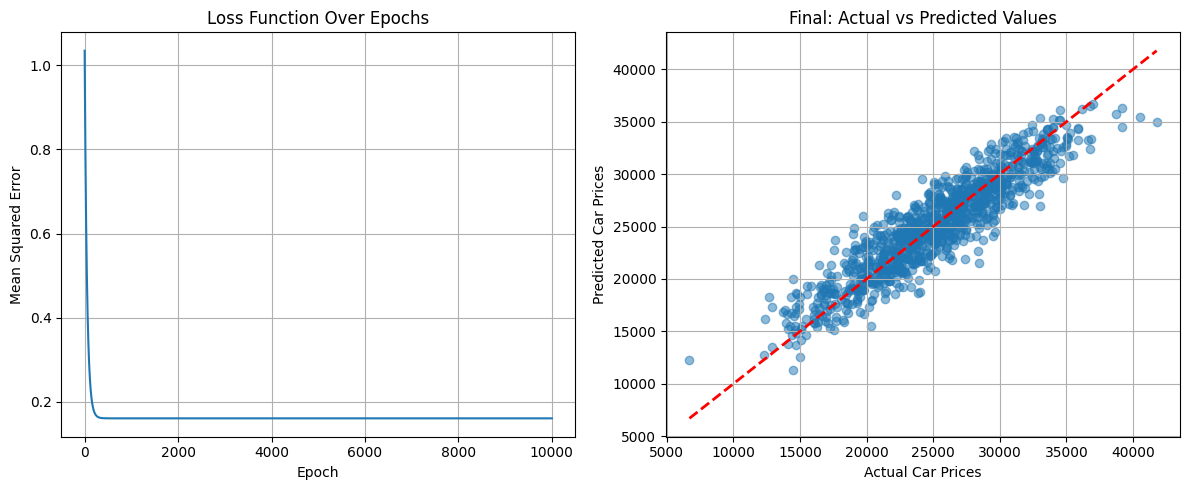

Final Loss (MSE): 0.160459
Final R² Score: 0.8395
Training completed in 10000 epochs


In [209]:
def create_prediction_animation():
    """Create animated GIF showing prediction improvement over epochs"""
    
    # Create directory for temporary images
    if not os.path.exists('temp_plots'):
        os.makedirs('temp_plots')
    
    # Get data for plotting
    y_actual_original = scaler_y.inverse_transform(y_scaled.reshape(-1, 1)).flatten()
    
    image_files = []
    
    # Create plots for each saved epoch
    for i, epoch in enumerate(sorted(model.epoch_predictions.keys())):
        plt.figure(figsize=(10, 8))
        
        # Get predictions for this epoch
        y_pred_epoch = model.epoch_predictions[epoch]
        y_pred_original = scaler_y.inverse_transform(y_pred_epoch.reshape(-1, 1)).flatten()
        
        # Create subplot layout with 3 plots (removed residuals)
        plt.subplot(2, 2, 1)
        # Plot 1: Loss history up to current epoch
        epochs_so_far = list(range(epoch + 1))
        loss_so_far = model.loss_history[:epoch + 1]
        plt.plot(epochs_so_far, loss_so_far, 'b-', linewidth=2)
        plt.title(f'Loss Function (Epoch {epoch})')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.xlim(0, model.epochs)
        if len(model.loss_history) > 0:
            plt.ylim(0, max(model.loss_history[:1000]) * 1.1)  # Set consistent y-axis
        
        # Plot 2: Actual vs Predicted
        plt.subplot(2, 2, 2)
        plt.scatter(y_actual_original, y_pred_original, alpha=0.6, s=30)
        
        # Perfect prediction line
        min_val = min(y_actual_original.min(), y_pred_original.min())
        max_val = max(y_actual_original.max(), y_pred_original.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        
        plt.title(f'Actual vs Predicted (Epoch {epoch})')
        plt.xlabel('Actual Car Prices')
        plt.ylabel('Predicted Car Prices')
        plt.grid(True)
        plt.legend()
        
        # Calculate R² score for this epoch
        ss_res = np.sum((y_actual_original - y_pred_original) ** 2)
        ss_tot = np.sum((y_actual_original - np.mean(y_actual_original)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        
        # Plot 3: Statistics text (moved to bottom left)
        plt.subplot(2, 2, 3)
        plt.axis('off')
        stats_text = f"""
        Epoch: {epoch}
        Loss (MSE): {model.loss_history[epoch]:.6f}
        R² Score: {r2_score:.4f}
        Learning Rate: {model.lr}
        
        Data Points: {len(y_actual_original)}
        Features: {X.shape[1]}
        """
        plt.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        
        plt.tight_layout()
        
        # Save plot
        filename = f'temp_plots/epoch_{epoch:05d}.png'
        plt.savefig(filename, dpi=80, bbox_inches='tight')
        image_files.append(filename)
        plt.close()
        
        print(f"Created plot for epoch {epoch}")
    
    # Create GIF
    images = []
    for filename in image_files:
        images.append(Image.open(filename))
    
    # Save as GIF
    gif_filename = 'linear_regression_training.gif'
    images[0].save(
        gif_filename,
        save_all=True,
        append_images=images[1:],
        duration=800,  # 800ms per frame
        loop=0
    )
    
    # Clean up temporary files
    for filename in image_files:
        os.remove(filename)
    os.rmdir('temp_plots')
    
    print(f"\nAnimation saved as '{gif_filename}'")
    print(f"Total frames: {len(images)}")
    
    return gif_filename

# Create the animation
gif_file = create_prediction_animation()

# Also create the final static plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.loss_history)
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.subplot(1, 2, 2)
y_pred_train = model.predict(X_scaled)
y_actual_original = scaler_y.inverse_transform(y_scaled.reshape(-1, 1)).flatten()
y_pred_original = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()

plt.scatter(y_actual_original, y_pred_original, alpha=0.5)
plt.plot([y_actual_original.min(), y_actual_original.max()], 
         [y_actual_original.min(), y_actual_original.max()], 'r--', lw=2)
plt.title('Final: Actual vs Predicted Values')
plt.xlabel('Actual Car Prices')
plt.ylabel('Predicted Car Prices')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
final_loss = model.loss_history[-1]
ss_res = np.sum((y_actual_original - y_pred_original) ** 2)
ss_tot = np.sum((y_actual_original - np.mean(y_actual_original)) ** 2)
final_r2 = 1 - (ss_res / ss_tot)

print(f"Final Loss (MSE): {final_loss:.6f}")
print(f"Final R² Score: {final_r2:.4f}")
print(f"Training completed in {model.epochs} epochs")